In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
pickled_films = os.path.join("data", "generated", "films_raw.pkl")
raw_film_data = pd.read_pickle(pickled_films)

# REDO THIS WHOLE THING, because i modded the data, and added a attribute

# A) get a quick look

In [3]:
raw_film_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71992 entries, 0 to 71991
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   tconst             71992 non-null  object        
 1   watched            71992 non-null  bool          
 2   watched_date       1217 non-null   datetime64[ns]
 3   netflix            21897 non-null  Int64         
 4   prime              21130 non-null  Int64         
 5   enjoyment          23458 non-null  float64       
 6   priority           2514 non-null   float64       
 7   titleType          71992 non-null  object        
 8   primaryTitle       71992 non-null  object        
 9   originalTitle      71992 non-null  object        
 10  isAdult            71992 non-null  object        
 11  startYear          71912 non-null  object        
 12  endYear            99 non-null     object        
 13  runtimeMinutes     71220 non-null  object        
 14  genres

In [4]:
raw_film_data.describe()

,netflix,prime,enjoyment,priority,averageRating,numVotes,ordering,birthYear,deathYear
count,21897.000000,21130.000000,23458.000000,2514.0,70991.000000,7.099100e+04,68409.000000,55669.000000,10377.000000
mean,0.221035,0.109702,2.983588,1.0,7.309203,3.890929e+05,5.514026,1956.011838,1994.115062
std,0.414953,0.312525,0.919054,0.0,0.972877,4.402795e+05,2.787086,26.323785,36.235811
min,0.000000,0.000000,1.000000,1.0,3.400000,6.500000e+01,1.000000,1414.000000,1471.000000
25%,0.000000,0.000000,2.000000,1.0,6.700000,7.717300e+04,3.000000,1946.000000,1983.000000
50%,0.000000,0.000000,3.000000,1.0,7.400000,2.262160e+05,5.000000,1961.000000,2000.000000
75%,0.000000,0.000000,4.000000,1.0,8.100000,5.569780e+05,8.000000,1971.000000,2014.000000
max,1.000000,1.000000,5.000000,1.0,9.300000,2.703437e+06,10.000000,2012.000000,2023.000000


There is that weird minimum birth and deathyear again

<AxesSubplot:>

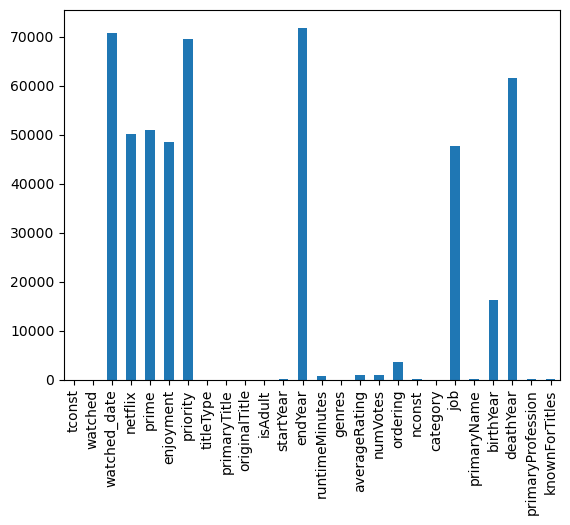

In [5]:
raw_film_data.isna().sum().plot.bar()

<li>todo: must remove the watched_date, netflix and prime columns.</li>
<li>what to do with the missing values of endYear, job, birthYear, deathYear?</li>

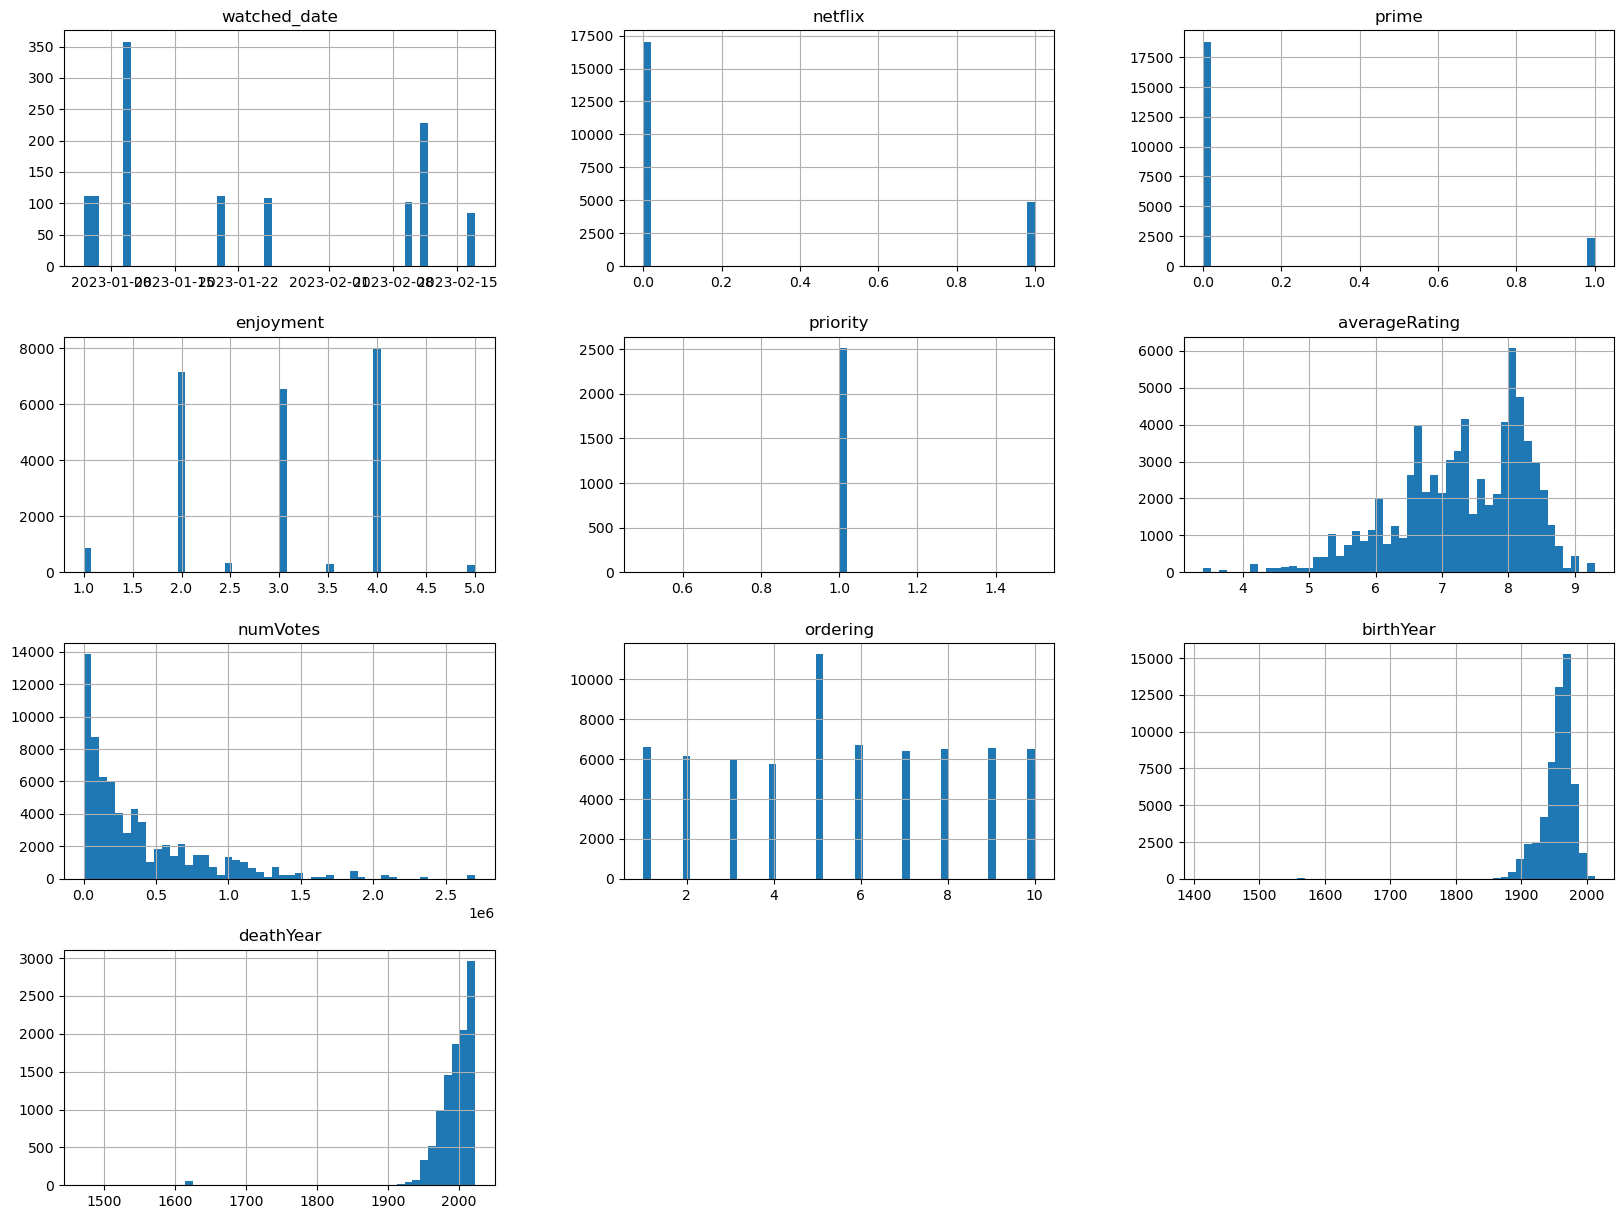

In [6]:
%matplotlib inline
raw_film_data.hist(bins=50, figsize=(20,15))
plt.show()

<li>The data is pretty skewed.</li> 
<li>numVotes should be transformed.</li>
<li>There is a bias for movies with a score of 6.5 to 7.5 and 7.5 to 8.5.</li>
<li>There is a bias for birthyear and deathyear</li>


 

# B) look into individual attributes

## 1) tconst

In [7]:
raw_film_data.loc[:,'tconst'].str.slice(start=0, stop=2).value_counts()

tt    71992
Name: tconst, dtype: int64

We can turn tconst into an partial identifier

{'whiskers': [<matplotlib.lines.Line2D at 0x7f1867ba6e90>,
 'caps': [<matplotlib.lines.Line2D at 0x7f1867ba7430>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f1867ba6bc0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f1867ba79d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f1867ba7ca0>],
 'means': []}

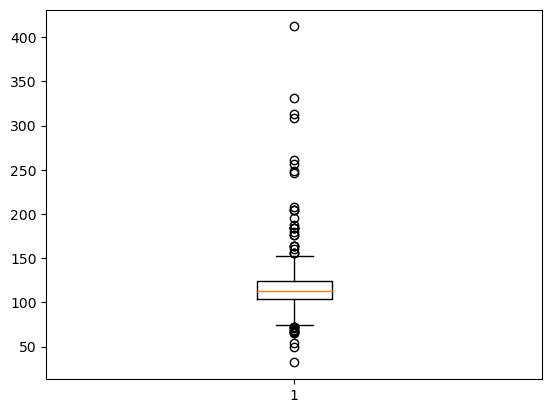

In [8]:
tconst_dups = raw_film_data.loc[:,'tconst'].value_counts().values
plt.boxplot(tconst_dups)

so most movies have between 75 and 160 rows of data. That's important info to combat skewedness in the data. We could take ~120 (median) samples for every movie for the dataset.

## 2) titleType

In [9]:
raw_film_data.loc[:,'titleType'].value_counts()

movie        71137
tvSeries       360
video          204
tvMovie        132
tvSpecial      109
short           50
Name: titleType, dtype: int64

Basically no varaiation in this variable, we remove it.

## 3) isAdult

In [10]:
raw_film_data.loc[:,'isAdult'].value_counts()

0    71992
Name: isAdult, dtype: int64

This variable does not contain usefull information, remove the column.

## 4) startYear

In [11]:
raw_film_data.loc[:,'startYear'].astype('Int64').isna().value_counts()

False    71912
True        80
Name: startYear, dtype: int64

(array([  297.,  1109.,   617.,  2168.,  2082.,  3373.,  4163., 11612.,
        15001., 31490.]),
 array([1924.0, 1933.9, 1943.8, 1953.7, 1963.6, 1973.5, 1983.4, 1993.3,
        2003.2, 2013.1, 2023.0], dtype=object),
 <BarContainer object of 10 artists>)

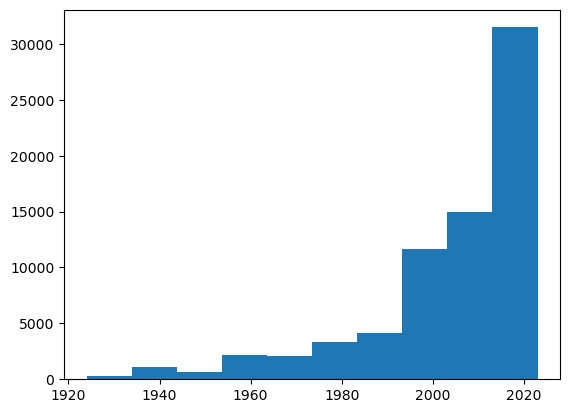

In [12]:
raw_film_data.loc[:,'startYear'] = raw_film_data.loc[:,'startYear'].astype('Int64')
years = raw_film_data.loc[~raw_film_data.loc[:,'startYear'].isna(), 'startYear']
plt.hist(years.values)

80 rows are missing, probably just a few movies

(array([   88.,   120.,    89.,    96.,     0.,   789.,   224.,    96.,
          325.,   196.,   292.,   952.,   736.,   533.,   649.,   628.,
          588.,   999.,  1156.,  1090.,  1291.,   890.,  1503.,  2728.,
         2578.,  4075.,  4138.,  4929.,  4112.,  4532.,  6205., 13867.,
        11418.]),
 array([1924, 1927, 1930, 1933, 1936, 1939, 1942, 1945, 1948, 1951, 1954,
        1957, 1960, 1963, 1966, 1969, 1972, 1975, 1978, 1981, 1984, 1987,
        1990, 1993, 1996, 1999, 2002, 2005, 2008, 2011, 2014, 2017, 2020,
        2023]),
 <BarContainer object of 33 artists>)

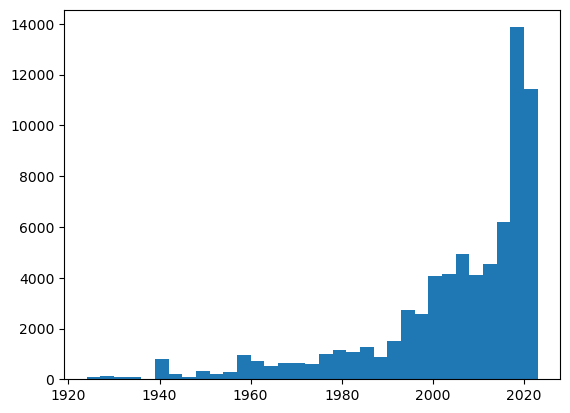

In [13]:
raw_film_data.loc[:,'startYear'] = raw_film_data.loc[:,'startYear'].astype('Int64')
years = raw_film_data.loc[~raw_film_data.loc[:,'startYear'].isna(), 'startYear']
y_min = years.values.min()
y_max = years.values.max()
step = int((y_max - y_min) / 30)
bins = list(range(y_min, y_max, step))
bins.append(y_max)
plt.hist(years.values, bins=bins)

We could categorize the years? We could also just remove 1900 from the year, that would make ik way more representetive as a number.

## 5) endYear

In [14]:
raw_film_data.loc[:,'endYear'].astype('Int64').isna().value_counts()

True     71893
False       99
Name: endYear, dtype: int64

There are only 10 endyears, so this attribute does not contain much information

## 6) runtimeMinutes

In [15]:
raw_film_data.loc[:,'runtimeMinutes'].astype('Int64').isna().value_counts()

False    71220
True       772
Name: runtimeMinutes, dtype: int64

just a few are missing, probably just best to add the median, average or wathever. lets look at the distribution.

(array([  311.,   388.,   736., 22372., 25345., 14886.,  4311.,  2033.,
          456.,   382.]),
 array([16.0, 38.2, 60.4, 82.6, 104.8, 127.0, 149.2, 171.4, 193.6,
        215.79999999999998, 238.0], dtype=object),
 <BarContainer object of 10 artists>)

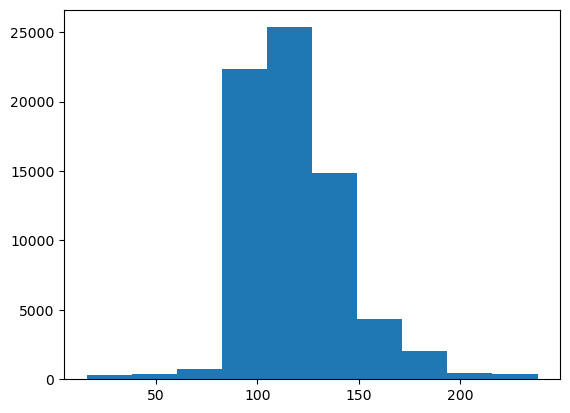

In [16]:
raw_film_data.loc[:,'runtimeMinutes'] = raw_film_data.loc[:,'runtimeMinutes'].astype('Int64')
rtm = raw_film_data.loc[~raw_film_data.loc[:,'runtimeMinutes'].isna(), 'runtimeMinutes']
plt.hist(rtm.values)

(array([  50.,    0.,  261.,    0.,   88.,    0.,  109.,  191.,    0.,
         208.,  431., 2778., 6672., 5919., 8066., 7365., 8431., 6481.,
        4903., 4581., 3847., 2401., 2192., 1183., 1016., 1176.,  328.,
        1233.,  240.,  480.,  119.,    0.,   89.,  108.,    0.,  146.,
         128.]),
 array([ 16,  22,  28,  34,  40,  46,  52,  58,  64,  70,  76,  82,  88,
         94, 100, 106, 112, 118, 124, 130, 136, 142, 148, 154, 160, 166,
        172, 178, 184, 190, 196, 202, 208, 214, 220, 226, 232, 238]),
 <BarContainer object of 37 artists>)

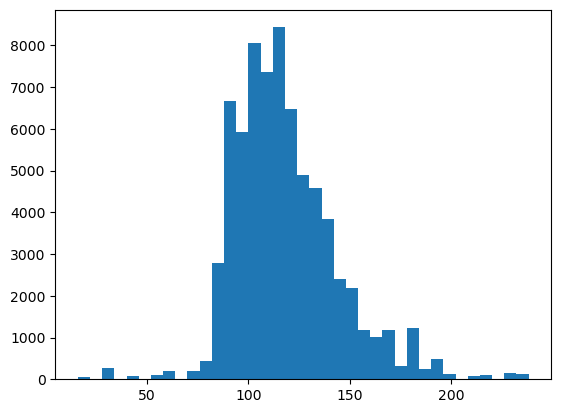

In [17]:

rtm_min = rtm.values.min()
rtm_max = rtm.values.max()
step = int((rtm_max - rtm_min) / 35)
bins = list(range(rtm_min, rtm_max, step))
bins.append(rtm_max)
plt.hist(rtm.values, bins=bins)

that's practically a poisson distribution, if you remove the small minutes. we can replace missing values with whatever the median/mean version of the poisson distribution is.<br>
How many elements are < 75 or > 200?

In [18]:
(rtm < 75).value_counts()

False    70313
True       907
Name: runtimeMinutes, dtype: Int64

In [19]:
(rtm > 200).value_counts()

False    70630
True       590
Name: runtimeMinutes, dtype: Int64

Those aren't that much, we can replace those with the 'median' of the Poisson distribution.

## 7) genres

In [20]:
genres = raw_film_data.loc[:,'genres']
genres

0          Action,Comedy,Romance
1          Action,Comedy,Romance
2          Action,Comedy,Romance
3          Action,Comedy,Romance
4          Action,Comedy,Romance
                  ...           
71987    Animation,Drama,Fantasy
71988    Animation,Drama,Fantasy
71989    Animation,Drama,Fantasy
71990    Animation,Drama,Fantasy
71991    Animation,Drama,Fantasy
Name: genres, Length: 71992, dtype: object

<AxesSubplot:>

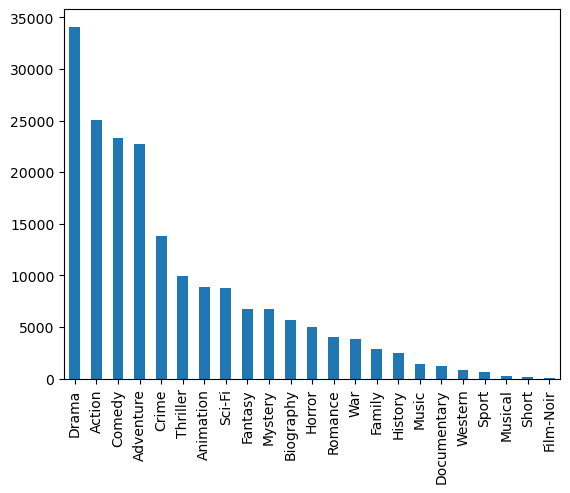

In [21]:
genres = genres.str.split(',').explode('genres')
genres.value_counts().plot.bar()

Half of al movies are drama. In other words: I don't care about this subject. It's overrepresented. Same for Action, Comedy and Adventure.<br>
Music, Documentary, Western, Sport, Musical, Short and Film Noir suffer from the same problem.<br>
Maybe it's best to remove those. Lets look at interactions with the categories.<br>
But first let's make the plot again, but without duplicate movies.


<AxesSubplot:>

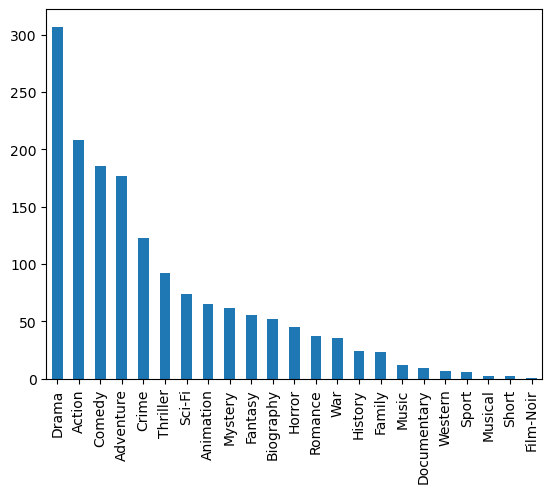

In [22]:
genres_uniq = raw_film_data.loc[:,['tconst','genres']].drop_duplicates()
genres_uniq.genres = genres_uniq.genres.str.split(',')
genres_uniq = genres_uniq.explode('genres')
genres_uniq.genres.value_counts().plot.bar()

I see no difference in distribution. Which is nice to know that the duplicates don't screw around with the data, or at least for this attribute.
Let's look at interactions.

<AxesSubplot:xlabel='genres_y', ylabel='genres_x'>

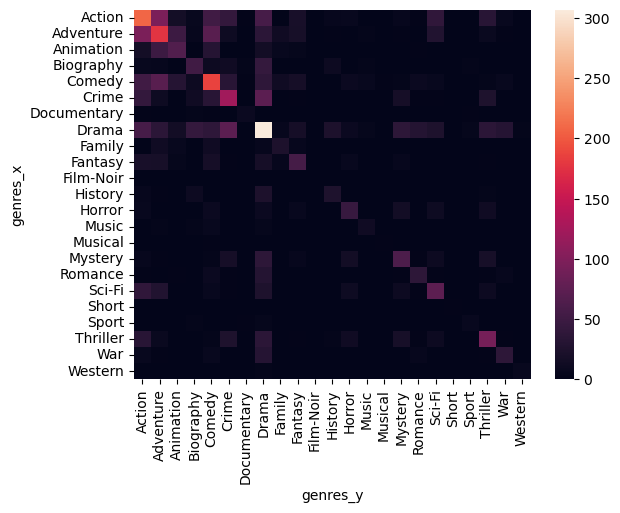

In [23]:
cross = pd.merge(genres_uniq, genres_uniq, how='cross')
in_same_movie = cross.loc[:,'tconst_x'] == cross.loc[:,'tconst_y']
genre_interaction_matrix = cross.loc[in_same_movie].loc[:,['genres_x','genres_y']].groupby(['genres_x','genres_y']).size().unstack(fill_value=0)
sns.heatmap(genre_interaction_matrix)

The interactions aren't that clear (littery), let's replace the diagonal on 0.

<AxesSubplot:xlabel='genres_y', ylabel='genres_x'>

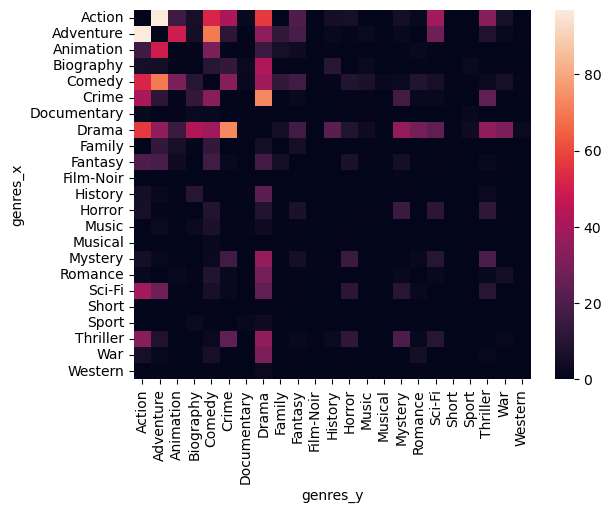

In [24]:
no_identity = genre_interaction_matrix.unstack().reset_index()
same = no_identity.loc[:,'genres_x'] == no_identity.loc[:,'genres_y']
no_identity.loc[same,0] = 0
sns.heatmap(pd.pivot_table(no_identity, values=0, index='genres_x', columns='genres_y'))

Lets visualize the interaction count, which is we are going to use as a ROC-plot. I don't know if this is legal, call the police.

<AxesSubplot:xlabel='genres_x,genres_y'>

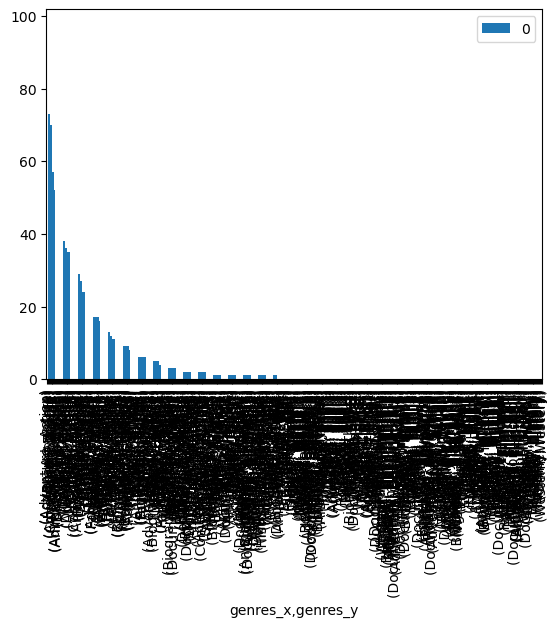

In [25]:
test = no_identity.sort_values(0, ascending=False)
test = test.set_index(['genres_x', 'genres_y'])
test.plot.bar()

the belly of this curve is around 8

<AxesSubplot:xlabel='genres_y', ylabel='genres_x'>

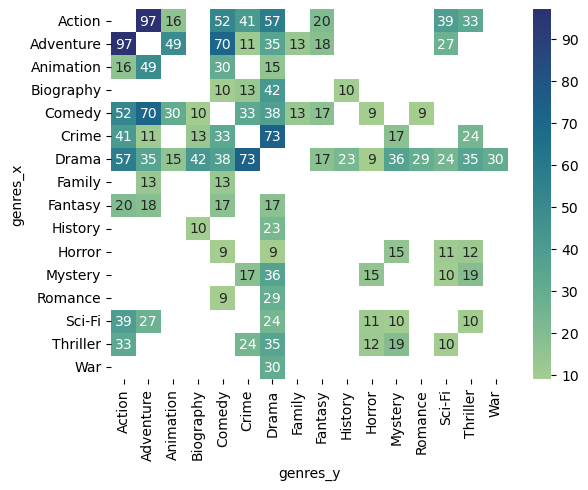

In [26]:
interesting_interaction = no_identity.loc[no_identity.loc[:,0] > 8,:]
pivoted = pd.pivot_table(interesting_interaction, values=0, index='genres_x', columns='genres_y')
sns.heatmap(pivoted, annot=True, cmap='crest')

interesting_interaction starts getting really high after 42 (awesome)

<AxesSubplot:xlabel='genres_x,genres_y'>

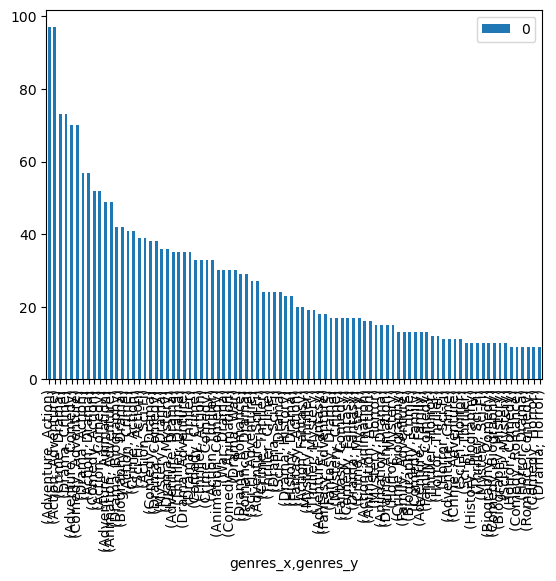

In [27]:
test = interesting_interaction.sort_values(0, ascending=False)
test = test.set_index(['genres_x', 'genres_y'])
test.plot.bar()

<AxesSubplot:xlabel='genres_y', ylabel='genres_x'>

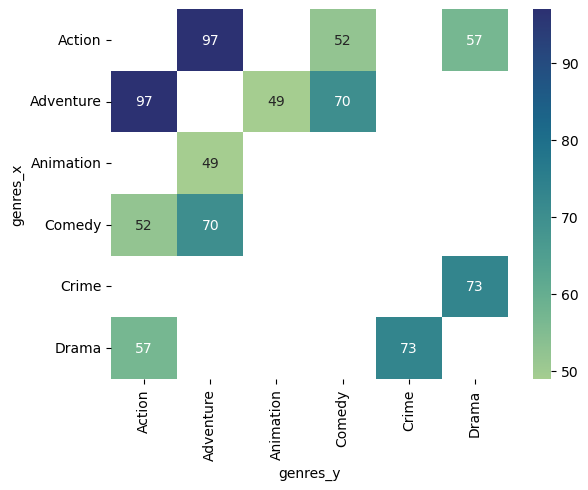

In [28]:
interesting_interaction42 = no_identity.loc[no_identity.loc[:,0] > 42,:]
pivoted42 = pd.pivot_table(interesting_interaction42, values=0, index='genres_x', columns='genres_y')
sns.heatmap(pivoted42, annot=True, cmap='crest')

If we look at all the previous plots, the biggest genres to have an interaction are: Action, Adventure, Crime, Drama, Comedy, in that order.<br>
This makes sense, because i watch that a lot. But it also creates heavy bias.
It's probably better to remove these categories.

There are also the lesser genres: Music, Documentary, Wester, Sport, Musical, Short, Film-Noir. We definitely remove these categories.

## 8) averageRating

In [29]:
avgrate_na = raw_film_data.loc[:,'averageRating'].isna()
avgrate_na.value_counts()

False    70991
True      1001
Name: averageRating, dtype: int64

Movies without rating aren't even watched by anyone yet. That's not a good representation of the data. We just remove those rows.

(array([   0.,  120.,    0.,   77.,    0.,  240.,  384.,  181.,  664.,
         721., 1185., 2715., 1875., 2056., 4824., 3965., 4828., 8474.,
        4163., 4095., 5531., 8561., 8298., 6108., 1087.,  587.,  124.,
         128.,    0.,    0.]),
 array([ 3.        ,  3.23333333,  3.46666667,  3.7       ,  3.93333333,
         4.16666667,  4.4       ,  4.63333333,  4.86666667,  5.1       ,
         5.33333333,  5.56666667,  5.8       ,  6.03333333,  6.26666667,
         6.5       ,  6.73333333,  6.96666667,  7.2       ,  7.43333333,
         7.66666667,  7.9       ,  8.13333333,  8.36666667,  8.6       ,
         8.83333333,  9.06666667,  9.3       ,  9.53333333,  9.76666667,
        10.        ]),
 <BarContainer object of 30 artists>)

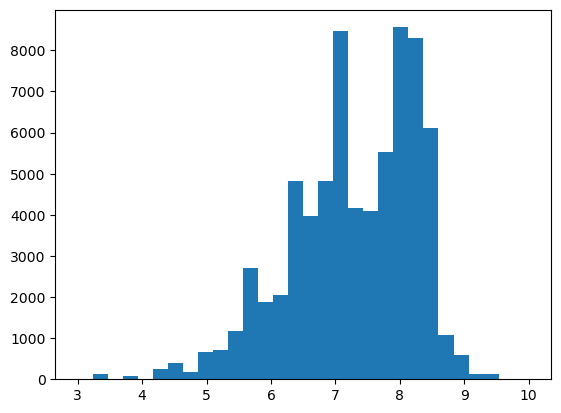

In [30]:
ratings = raw_film_data.loc[~avgrate_na,'averageRating']
ratings_min = int(ratings.values.min())
ratings_max = int(ratings.values.max())+1
step = (ratings_max - ratings_min) / 30
bins = list(np.arange(ratings_min,ratings_max,step))
bins.append(ratings_max)
plt.hist(ratings.values, bins=bins)

This kinda follows a poisson distribution. Which makes sense, because if a movie has a high rating, it has more chance that i am going to watch that movie. We can also make up that i'm not going to watch a movie with a score lower than 4.<br>
Lets remove scores < 4 and round the numbers to the nearest 0.5

(array([    0.,     0.,   197.,     0.,   240.,     0.,   384.,     0.,
         1262.,     0.,  3362.,     0.,  4773.,     0.,  8789.,     0.,
            0., 13302.,     0., 10086.,     0., 17007.,     0., 10027.,
            0.,  1434.,     0.,   128.,     0.,     0.]),
 array([ 3.        ,  3.23333333,  3.46666667,  3.7       ,  3.93333333,
         4.16666667,  4.4       ,  4.63333333,  4.86666667,  5.1       ,
         5.33333333,  5.56666667,  5.8       ,  6.03333333,  6.26666667,
         6.5       ,  6.73333333,  6.96666667,  7.2       ,  7.43333333,
         7.66666667,  7.9       ,  8.13333333,  8.36666667,  8.6       ,
         8.83333333,  9.06666667,  9.3       ,  9.53333333,  9.76666667,
        10.        ]),
 <BarContainer object of 30 artists>)

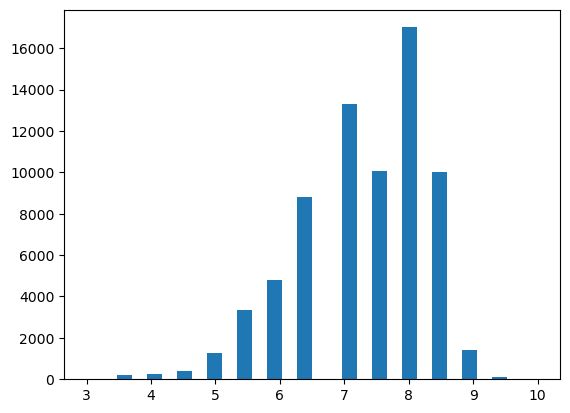

In [31]:
# alles wat niet 0 is moet naar beneden (maak er een int van)
def round_to(n, precision):
    correction = 0.5 if n >= 0 else -0.5
    return int( n/precision+correction ) * precision

def round_to_5(n):
    return round_to(n, 0.5)

ratings = raw_film_data.loc[~avgrate_na,'averageRating'].apply(round_to_5)
ratings_min = int(ratings.values.min())
ratings_max = int(ratings.values.max())+1
step = (ratings_max - ratings_min) / 30
bins = list(np.arange(ratings_min,ratings_max,step))
bins.append(ratings_max)
plt.hist(ratings.values, bins=bins)

still isn't really it. Let's remove everything lower than 5. then make 10 bins.

(array([ 1992.,  4310.,  4974., 11430., 12637.,  9626., 19823.,  4363.,
          707.,     0.]),
 array([ 5. ,  5.5,  6. ,  6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. ]),
 <BarContainer object of 10 artists>)

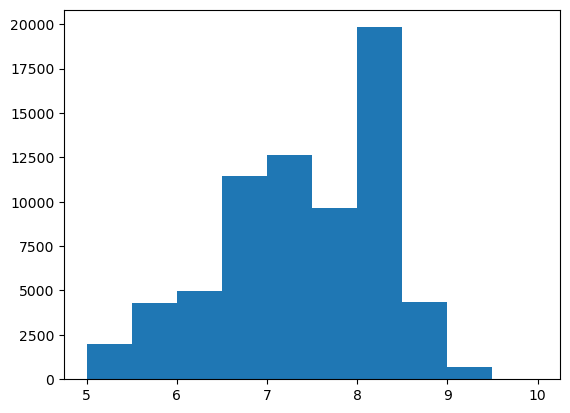

In [32]:
ratings = raw_film_data.loc[~avgrate_na,'averageRating']
ratings = ratings.loc[ratings >= 5]
ratings
ratings_min = int(ratings.values.min())
ratings_max = int(ratings.values.max())+1
step = (ratings_max - ratings_min) / 10
bins = list(np.arange(ratings_min,ratings_max,step))
bins.append(ratings_max)
plt.hist(ratings.values, bins=bins)

(array([  954.,  3362.,  4773.,  8789., 13302., 10086., 17007., 10027.,
         1434.,   128.]),
 array([ 5. ,  5.5,  6. ,  6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. ]),
 <BarContainer object of 10 artists>)

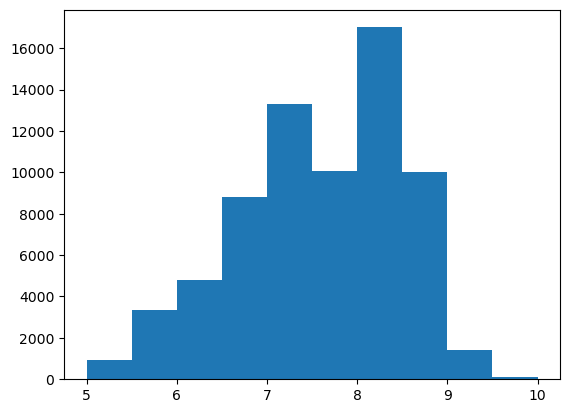

In [33]:
ratings = ratings.apply(round_to_5)
ratings_min = int(ratings.values.min())
ratings_max = int(ratings.values.max())+1
step = (ratings_max - ratings_min) / 10
bins = list(np.arange(ratings_min,ratings_max,step))
bins.append(ratings_max)
plt.hist(ratings.values, bins=bins)

This looks more usefull. still need to reduce the bias in this. We can make it look more like a Poisson distribution if we take a bit of data out. But not sure about doing that.

## 9) numVotes

In [34]:
# remove duplicates to speed up plotting
nvotes = raw_film_data.loc[:,['tconst','numVotes']].drop_duplicates().loc[:,'numVotes']
nvotes.isna().value_counts()

False    608
True       9
Name: numVotes, dtype: int64

same problem as with averageRating

(array([85., 46., 46., 32., 28., 26., 34., 17., 21., 15., 10., 14., 18.,
        17., 12., 14.,  5.,  4.,  7.,  8.,  7., 10.,  5.,  7., 10.,  7.,
         4.,  3., 10.,  3.,  5.,  7.,  5.,  1.,  2.,  0.,  7.,  4.,  6.,
         1.,  3.,  5.,  3.,  2.,  2.,  1.,  1.,  0.,  3.,  3.,  1.,  1.,
         1.,  1.,  2.,  1.,  0.,  0.,  1.,  0.,  0.,  1.,  1.,  1.,  0.,
         0.,  0.,  0.,  2.,  2.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  1.,
         0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  2.]),
 array([6.50000000e+01, 2.70987200e+04, 5.41324400e+04, 8.11661600e+04,
        1.08199880e+05, 1.35233600e+05, 1.62267320e+05, 1.89301040e+05,
        2.16334760e+05, 2.43368480e+05, 2.70402200e+05, 2.97435920e+05,
        3.24469640e+05, 3.51503360e+05, 3.78537080e+05, 4.05570800e+05,
        4.32604520e+05, 4.59638240e+05, 4.86671960e+05, 5.13705680e+05,
        5.40739400e+05, 5.67773120e+05, 5.94806840e+05, 6.21840560e+05,
  

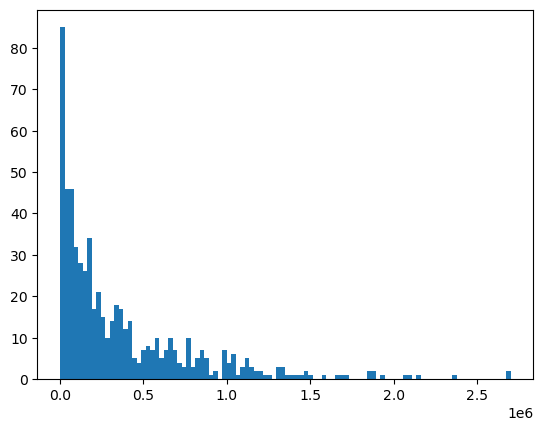

In [35]:
nvotes = nvotes.loc[~nvotes.isna()].sort_values()
nvotes_min = nvotes.values.min()
nvotes_max = nvotes.values.max()
step = (nvotes_max - nvotes_min) / 100
bins = list(np.arange(nvotes_min,nvotes_max,step))
bins.append(nvotes_max)
plt.hist(nvotes.values, bins=bins)

There are quite a lot of movies with a low number of votes, i'm quite surprised.

{'whiskers': [<matplotlib.lines.Line2D at 0x7f1864ac1300>,
 'caps': [<matplotlib.lines.Line2D at 0x7f1864ac18a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f1864ac1150>],
 'medians': [<matplotlib.lines.Line2D at 0x7f1864ac1e40>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f1864ac2110>],
 'means': []}

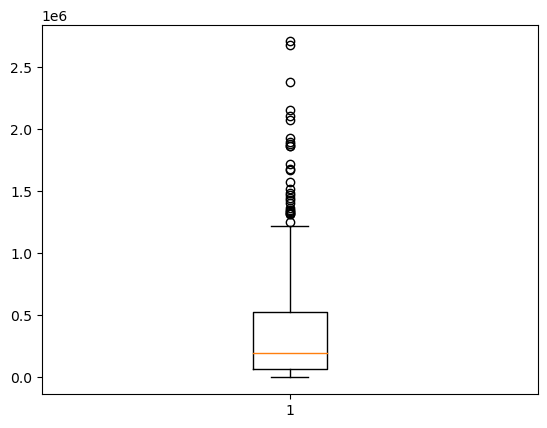

In [36]:
plt.boxplot(nvotes)

so 3/4 of the movies has less than a around 0.5 million votes, interesting.

(array([29., 25.,  9.,  9.,  6., 16., 11.,  9.,  4.,  7.,  8., 10., 10.,
         6.,  5., 11.,  9.,  4.,  6.,  7.,  4.,  5.,  5.,  5.,  8.,  6.,
         3.,  2.,  6.,  1.,  9.,  5.,  4.,  5.,  5.,  7.,  8.,  8.,  4.,
         2.,  5.,  5.,  1.,  2.,  3.,  4.,  2.,  5.,  5.,  5.,  1.,  3.,
         3.,  3.,  2.,  3.,  1.,  2.,  1.,  2.,  2.,  1.,  1.,  5.,  4.,
         1.,  5.,  8.,  2.,  1.,  3.,  5.,  3.,  3.,  1.,  1.,  3.,  0.,
         3.,  2.,  2.,  5.,  4.,  2.,  3.,  2.,  2.,  2.,  0.,  2.,  0.,
         1.,  0.,  0.,  0.,  0.,  3.,  1.,  0.,  4.]),
 array([6.5000000e+01, 5.0423700e+03, 1.0019740e+04, 1.4997110e+04,
        1.9974480e+04, 2.4951850e+04, 2.9929220e+04, 3.4906590e+04,
        3.9883960e+04, 4.4861330e+04, 4.9838700e+04, 5.4816070e+04,
        5.9793440e+04, 6.4770810e+04, 6.9748180e+04, 7.4725550e+04,
        7.9702920e+04, 8.4680290e+04, 8.9657660e+04, 9.4635030e+04,
        9.9612400e+04, 1.0458977e+05, 1.0956714e+05, 1.1454451e+05,
        1.1952188e+05, 1.2

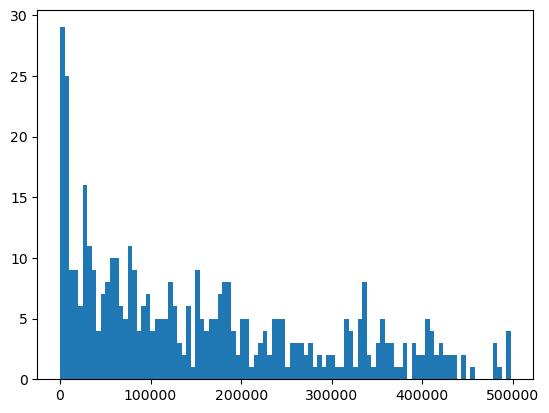

In [37]:
nvotes_part = nvotes.loc[(nvotes < 500000) & ~nvotes.isna()]
nvotes_part_min = nvotes_part.values.min()
nvotes_part_max = nvotes_part.values.max()
step = (nvotes_part_max - nvotes_part_min) / 100
bins = list(np.arange(nvotes_part_min, nvotes_part_max,step))
bins.append(nvotes_part_max)
plt.hist(nvotes_part.values, bins=bins)

This should definitely be transformed to favor higher number of votes. Because a higher number votes creates a more reliable score.<br>
We also saw some outliers, both low and high that we should first take out.<br>
The high number of votes also creates a bias we should look into that and find a way to correct for that.

## 10) ordering

In [38]:
raw_film_data.loc[:,'ordering'].isna().value_counts()

False    68409
True      3583
Name: ordering, dtype: int64

There are missing values. Because we added writer and director data

<AxesSubplot:>

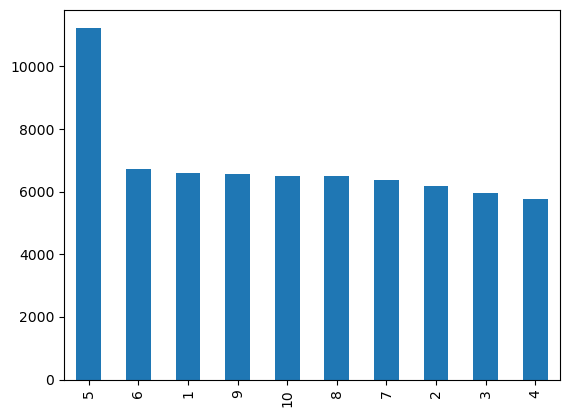

In [39]:
raw_film_data.loc[~raw_film_data.loc[:,'ordering'].isna(),'ordering'].value_counts().plot.bar()

the peak in the 5 is probably because of the duplicate rows.

<AxesSubplot:>

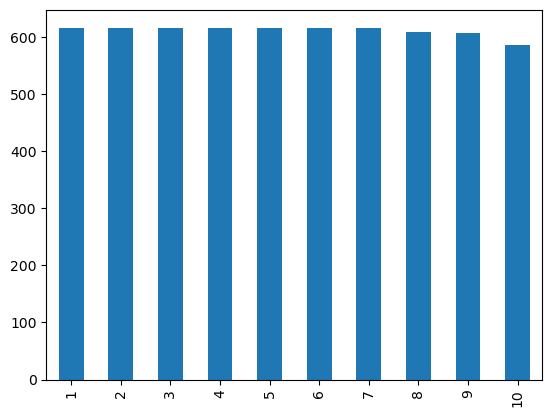

In [40]:
raw_film_data.loc[:,['ordering','tconst','nconst']].drop_duplicates().loc[:,'ordering'].value_counts().plot.bar()

<p>The ordering is the order of importance of the actors in a movie. Apparently there are not more than 10 orderings. So the ordering isn't an index for 1 actor? let's look at that.<p>
<p>EDIT: we already know that the personell are only the first 10 from the ordering list. For all personell you probably have to buy iMDb pro.</p>


In [41]:
raw_film_data.loc[raw_film_data.loc[:,'tconst']=='tt0015324',['tconst','nconst','ordering']]

,tconst,nconst,ordering
0,tt0015324,nm0504380,10
1,tt0015324,nm0504380,10
2,tt0015324,nm0504380,10
3,tt0015324,nm0504380,10
4,tt0015324,nm0504380,10
...,...,...,...
83,tt0015324,nm0115669,7
84,tt0015324,nm0115669,7
85,tt0015324,nm0115669,7
86,tt0015324,nm0115669,7


In [42]:
raw_film_data.loc[:,['tconst','nconst']].drop_duplicates().groupby('tconst').count().value_counts()
# .groupby(['tconst','nconst']).sum()

nconst
10        543
9          21
11          9
13          9
12          8
7           6
15          2
25          2
8           2
14          2
17          2
18          2
19          2
21          2
28          1
3           1
24          1
16          1
35          1
dtype: int64

We don't have information about all the crew of a movie. Only the first 10 important people in the title.crew file.

ordering could have an indirect effect on the movie, must look into that.

## 11) nconst

In [43]:
raw_film_data.loc[:,'nconst'].value_counts()

nm0634240     240
nm0000233     180
nm0001392     144
nm0000116     144
nm0000217     144
             ... 
nm0059030       1
nm3810779       1
nm10465667      1
nm3546572       1
nm9167508       1
Name: nconst, Length: 4618, dtype: int64

so 1 person is in 240 entries

In [44]:
raw_film_data.loc[:,['tconst','nconst']].drop_duplicates().loc[:,'nconst'].value_counts()

nm0000134    12
nm0748784    11
nm0000168    11
nm0000138    11
nm0634240    10
             ..
nm0605479     1
nm0913860     1
nm0001084     1
nm0005454     1
nm3021346     1
Name: nconst, Length: 4618, dtype: int64

1 person in 12 movies

<AxesSubplot:title={'center':'how many times does a title crew member has an x amount of data rows'}>

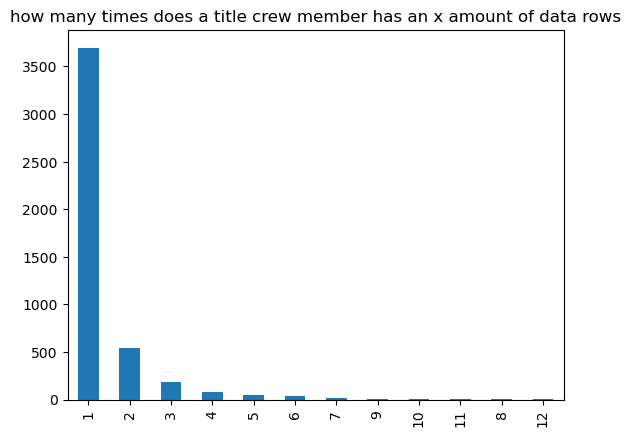

In [45]:
raw_film_data.loc[:,['tconst','nconst']].drop_duplicates().loc[:,'nconst'].value_counts().value_counts().plot.bar(title="how many times does a title crew member has an x amount of data rows")

So 3500+ title crew members only appear once in the movies i have seen. Kinda makes sense.<br>
We must convert this to an integer.Do they all start with nm?

In [46]:
raw_film_data.loc[:,'nconst'].str.slice(start=0, stop=2).value_counts()

nm    71986
Name: nconst, dtype: int64

Yes they do! So we can turn this into an integer and combine it with different attributes to make an identifier!

## 13) category

In [47]:
raw_film_data.loc[:,'category'].isna().value_counts()

False    71992
Name: category, dtype: int64

<AxesSubplot:>

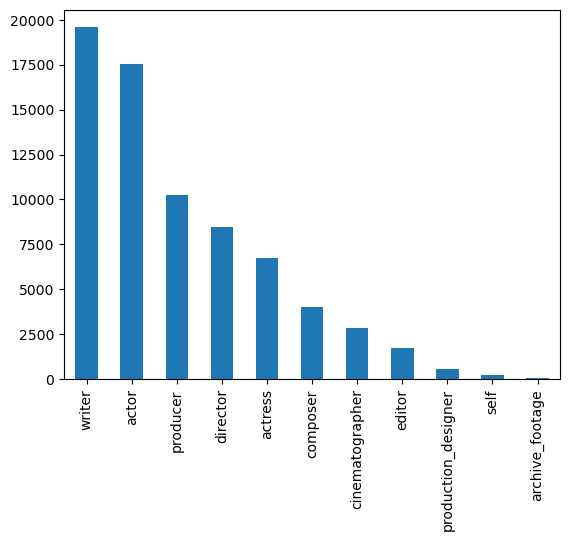

In [48]:
raw_film_data.loc[:,'category'].value_counts().plot.bar()

we could remove production_designer, self and archive_footage, but then we lose data

In [49]:
raw_film_data.loc[:,'category'].value_counts()

writer                 19578
actor                  17524
producer               10262
director                8479
actress                 6722
composer                4005
cinematographer         2834
editor                  1763
production_designer      552
self                     216
archive_footage           57
Name: category, dtype: int64

Are there movies without an producer or writer, if so, we need to use the other file

In [50]:
producer_occurence = raw_film_data.loc[raw_film_data.loc[:,'category'] == 'producer'].loc[:,'tconst'].drop_duplicates()
writer_occurence = raw_film_data.loc[raw_film_data.loc[:,'category'] == 'writer'].loc[:,'tconst'].drop_duplicates()
director_occurence = raw_film_data.loc[raw_film_data.loc[:,'category'] == 'director'].loc[:,'tconst'].drop_duplicates()
movie_occurence = raw_film_data.loc[:,'tconst'].drop_duplicates()

check if every movie has a producer, director, writer

In [51]:
movie_len = len(movie_occurence)

prod_len = len(pd.merge(producer_occurence, movie_occurence, how ='inner', on ='tconst'))
writ_len = len(pd.merge(writer_occurence, movie_occurence, how ='inner', on ='tconst'))
dir_len = len(pd.merge(director_occurence, movie_occurence, how ='inner', on ='tconst'))

prod_bool = prod_len == movie_len
writer_bool = writ_len == movie_len
dir_bool = dir_len  == movie_len

print("movie len:", movie_len)
print("producer_check:", prod_bool, prod_len)
print("writer_check:", writer_bool, writ_len)
print("director_check:", dir_bool, dir_len)

movie len: 617
producer_check: False 499
writer_check: True 617
director_check: True 617


Woohoo, the script worked!

Maybe we should put actor and actress into the same category actor. and make a new collumn gender.

In [52]:
gender_test = raw_film_data.loc[:,'category'].value_counts()
actor = gender_test.loc['actor']
actress = gender_test.loc['actress']
non_gender = gender_test.index.to_list()
non_gender_sum = gender_test.loc[non_gender].values.sum()
print('men: ', actor)
print('women: ', actress)
print('unknown:', non_gender_sum)

men:  17524
women:  6722
unknown: 71992


oke, now let's do the same but without duplicates

In [53]:
gender_test = raw_film_data.loc[:,['tconst','nconst', 'category']].drop_duplicates().value_counts('category')
actor = gender_test.loc['actor']
actress = gender_test.loc['actress']
non_gender = gender_test.index.to_list()
non_gender_sum = gender_test.loc[non_gender].values.sum()
print('men: ', actor)
print('women: ', actress)
print('unknown:', non_gender_sum)


men:  1716
women:  726
unknown: 6827


## 14) Job

In [54]:
raw_film_data.loc[:,'job'].isna().value_counts()

True     47737
False    24255
Name: job, dtype: int64

That's a lot of missing jobs

In [55]:
raw_film_data.loc[:,'job'].value_counts()

producer                                           10147
written by                                          2267
screenplay by                                       2065
screenplay                                          2006
director of photography                             1788
                                                   ...  
article                                                1
book "The Elephant Man and Other Reminiscences"        1
based on the book "The House of Gucci" by              1
with illustrations by                                  1
co-director of photography                             1
Name: job, Length: 208, dtype: int64

As you can see already, there are variations of the same job titles. let's remove the word ' by'.

<AxesSubplot:>

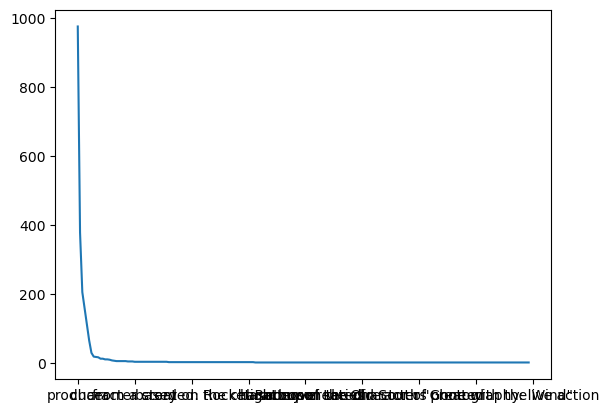

In [56]:
jobs_test = raw_film_data.loc[:,['nconst','tconst','job']].drop_duplicates()
jobs_test.loc[:,'job'] = jobs_test.loc[:,'job'].str.replace(" by", "").replace("based on the ", "").replace("written", "writer").replace("based on the book","book").replace("based on the novel","book").replace('novel','book').replace('film editor', 'editor')
jobs_test.loc[:,'job'].value_counts().plot()

In [57]:
all_jobs = jobs_test.loc[:,'job'].value_counts()
all_jobs.loc[all_jobs > 10]

producer                       976
screenplay                     378
writer                         205
director of photography        158
story                          113
book                            65
characters                      29
editor                          18
co-director                     17
based on characters created     16
screen play                     12
original story                  12
Name: job, dtype: int64

probably best to remove all jobs that have less than 100 counts.

In [58]:
all_jobs.loc[all_jobs > 100]

producer                   976
screenplay                 378
writer                     205
director of photography    158
story                      113
Name: job, dtype: int64

In [59]:
len(all_jobs.loc[all_jobs < 100].index)

194

that's a lot of jobs to remove. Maybe remove them and replace with category?

## 15) birthYear

In [60]:
raw_film_data.loc[:,'birthYear'].isna().value_counts()

False    55669
True     16323
Name: birthYear, dtype: int64

That's a lot of missing values

<AxesSubplot:xlabel='index', ylabel='year'>

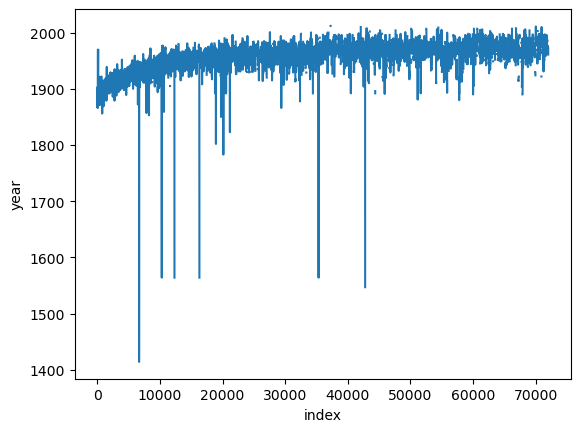

In [61]:
raw_film_data.loc[:,'birthYear'].plot(xlabel='index', ylabel='year')

What's interesting is the big 'line' which is constant. it indicates the age difference, which is mostly the same. There are also massive outliers. Let' remove duplicates to see what happens.

<AxesSubplot:xlabel='index', ylabel='year'>

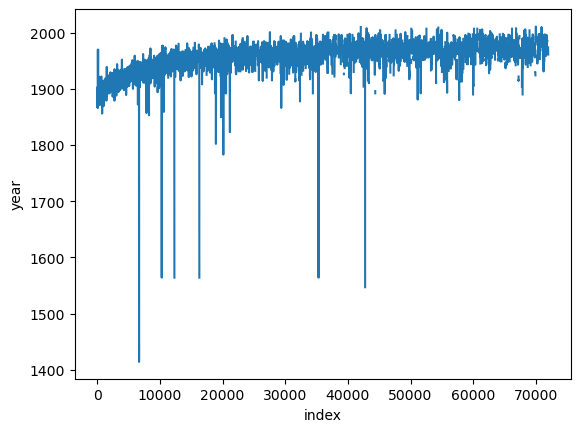

In [62]:
birthyears_test = raw_film_data.loc[:,['tconst','nconst','birthYear']].drop_duplicates()
birthyears_test.loc[:,'birthYear'].plot(xlabel='index', ylabel='year')

interesting, basically nothing happens. Let's try to find the cutoff that gives most off the data.

<AxesSubplot:xlabel='index', ylabel='year'>

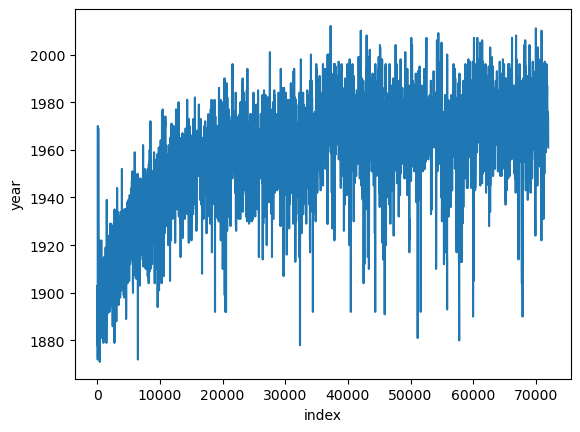

In [63]:
higher = birthyears_test.loc[:,'birthYear'] > 1870
birthyears_test.loc[higher,'birthYear'].plot(xlabel='index', ylabel='year')

This looks more plausible. How many have a year before 1870?

In [64]:
lower = birthyears_test.loc[:,'birthYear'] < 1870
birthyears_test.loc[lower,'birthYear']

24       1867
72       1866
769      1856
982      1869
6663     1414
7844     1857
8250     1853
10280    1564
10612    1859
12305    1564
16286    1564
18932    1802
19744    1850
20116    1783
21167    1823
29363    1866
35315    1564
42754    1547
Name: birthYear, dtype: Int64

Just a handfull. Those are probably outliers. It could also be that those values are from writers that were dead when the movie was made. for example: Shakespear.

{'whiskers': [<matplotlib.lines.Line2D at 0x7f18648cba00>,
 'caps': [<matplotlib.lines.Line2D at 0x7f18648cbfa0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f18648cb730>],
 'medians': [<matplotlib.lines.Line2D at 0x7f1864918580>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f1864918850>],
 'means': []}

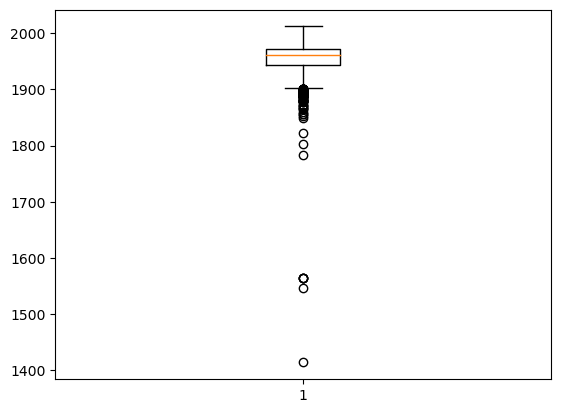

In [65]:
# plt.boxplot(birthyears_test.loc[:,'birthYear'])
plt.boxplot(birthyears_test.loc[:,'birthYear'].dropna())

Let's do the plot again, but this time withous the values before 1870.

{'whiskers': [<matplotlib.lines.Line2D at 0x7f1864761cc0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f1864762260>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f18647619f0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f1864762800>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f1864762ad0>],
 'means': []}

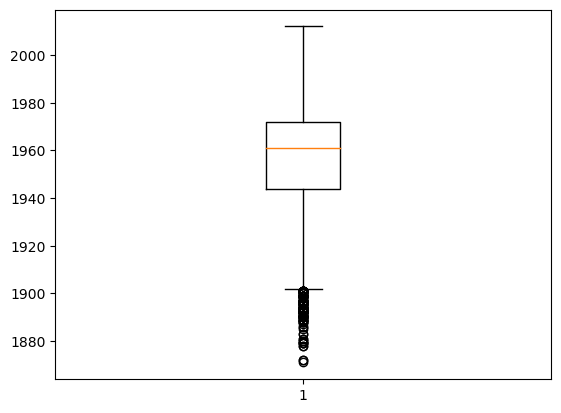

In [66]:
plt.boxplot(birthyears_test.loc[higher,'birthYear'].dropna())

{'whiskers': [<matplotlib.lines.Line2D at 0x7f18647e05b0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f18647e0b50>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f18647e02e0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f18647e10f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f18647e13c0>],
 'means': []}

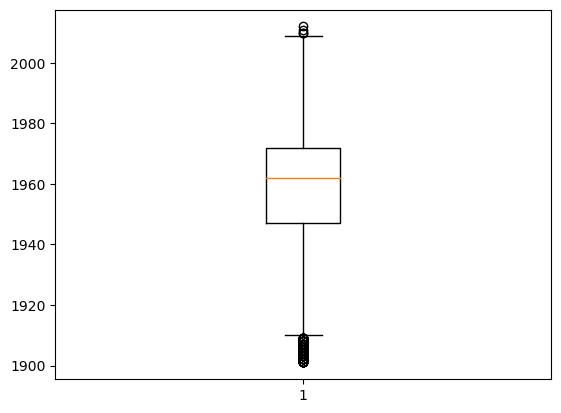

In [67]:
bigger19 = birthyears_test.loc[:,'birthYear'] > 1900
plt.boxplot(birthyears_test.loc[bigger19,'birthYear'].dropna())

That looks better.

let's make some better plots

(array([ 28.,   9.,  18.,  15.,  14.,  10.,  15.,  17.,  30.,  33.,  13.,
         33.,  19.,  16.,  18.,  12.,  11.,  24.,  46.,  17.,  20.,  23.,
         18.,  15.,  33.,  31.,  30.,  70.,  20.,  19.,  36.,  23.,  39.,
         22.,  33.,  42.,  77.,  64.,  44.,  19.,  60.,  55.,  60.,  79.,
         63., 147.,  62.,  60.,  74.,  67.,  87.,  91.,  86.,  82., 202.,
        123., 100., 115.,  75., 116.,  98., 128., 123., 190.,  68.,  89.,
         89.,  93.,  61.,  63.,  65.,  54., 112.,  64.,  34.,  26.,  36.,
         23.,  29.,  33.,  22.,  34.,  18.,  16.,  17.,  30.,  11.,  10.,
          5.,   5.,   4.,   3.,   6.,   2.,   4.,   6.,   2.,   1.,   2.,
          2.]),
 array([1901.  , 1902.11, 1903.22, 1904.33, 1905.44, 1906.55, 1907.66,
        1908.77, 1909.88, 1910.99, 1912.1 , 1913.21, 1914.32, 1915.43,
        1916.54, 1917.65, 1918.76, 1919.87, 1920.98, 1922.09, 1923.2 ,
        1924.31, 1925.42, 1926.53, 1927.64, 1928.75, 1929.86, 1930.97,
        1932.08, 1933.19, 1934.3 ,

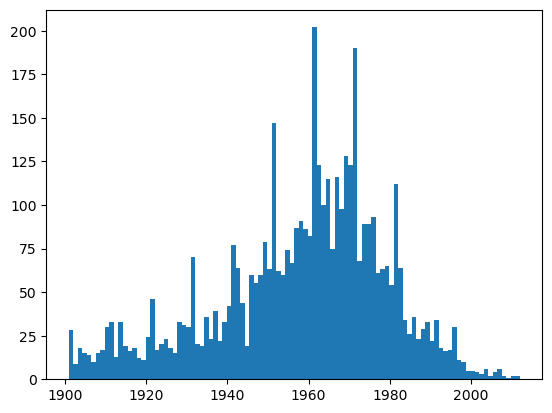

In [68]:
birthyears_after19 = birthyears_test.loc[bigger19,'birthYear'].dropna()
birthyears_min = birthyears_after19.values.min()
birthyears_max = birthyears_after19.values.max()
step = (birthyears_max - birthyears_min) / 100
bins = list(np.arange(birthyears_min, birthyears_max,step))
bins.append(birthyears_max)
plt.hist(birthyears_after19.values, bins=bins)

less bins

(array([ 84., 105.,  99., 110., 109., 170., 153., 246., 317., 410., 548.,
        529., 607., 395., 329., 147., 107.,  61.,  19.,  13.]),
 array([1901.  , 1906.55, 1912.1 , 1917.65, 1923.2 , 1928.75, 1934.3 ,
        1939.85, 1945.4 , 1950.95, 1956.5 , 1962.05, 1967.6 , 1973.15,
        1978.7 , 1984.25, 1989.8 , 1995.35, 2000.9 , 2006.45, 2012.  ]),
 <BarContainer object of 20 artists>)

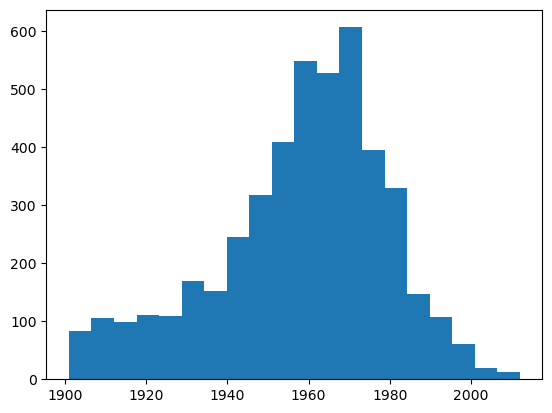

In [69]:
birthyears_after19 = birthyears_test.loc[bigger19,'birthYear'].dropna()
birthyears_min = birthyears_after19.values.min()
birthyears_max = birthyears_after19.values.max()
step = (birthyears_max - birthyears_min) / 20
bins = list(np.arange(birthyears_min, birthyears_max,step))
bins.append(birthyears_max)
plt.hist(birthyears_after19.values, bins=bins)

let's round to the nearest 5

In [81]:
# alles wat niet 0 is moet naar beneden (maak er een int van)
def round_to(n, precision):
    correction = 0.5 if n >= 0 else -0.5
    return int( n/precision+correction ) * precision

def round_to_5(n):
    return round_to(n, 5)


test = birthyears_after19.copy().to_frame()
test.loc[:,"rounded"] = test.loc[:,"birthYear"].apply(round_to_5)

(array([ 94.,  95.,  99.,  93.,  93., 164., 137., 174., 242., 349., 811.,
        529., 539., 400., 294., 183., 118.,  92.,  24.,  28.]),
 array([1900. , 1905.5, 1911. , 1916.5, 1922. , 1927.5, 1933. , 1938.5,
        1944. , 1949.5, 1955. , 1960.5, 1966. , 1971.5, 1977. , 1982.5,
        1988. , 1993.5, 1999. , 2004.5, 2010. ]),
 <BarContainer object of 20 artists>)

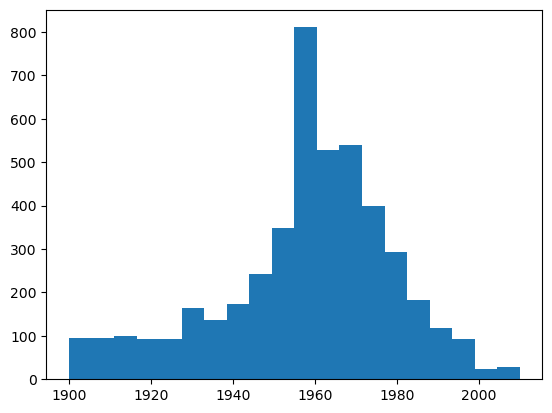

In [82]:
test_min = test.loc[:,"rounded"].values.min()
test_max = test.loc[:,"rounded"].values.max()
step = (test_max - test_min) / 20
bins = list(np.arange(test_min, test_max,step))
bins.append(test_max)
plt.hist(test.loc[:,"rounded"].values, bins=bins)

The categorisation in 20 bins looks good.

# boxplots for score and genre? comedies often have low scores, doesn't mean it's a bad comedy. adjust/normalize this?